In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [83]:
len(test_data)

2246

In [84]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [85]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [86]:
train_labels[10]

3

In [87]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [88]:
x_train = vectorize_sequences(train_data)

In [89]:
x_test = vectorize_sequences(test_data)

In [90]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [91]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [92]:
import keras
import keras.utils
from tensorflow.keras import layers
from keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [93]:
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

In [94]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [95]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [96]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 2.4778 - accuracy: 0.5031 - val_loss: 1.6370 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3788 - accuracy: 0.7066 - val_loss: 1.2761 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0399 - accuracy: 0.7735 - val_loss: 1.1271 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8143 - accuracy: 0.8255 - val_loss: 1.0247 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6429 - accuracy: 0.8641 - val_loss: 0.9797 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5085 - accuracy: 0.8954 - val_loss: 0.9394 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 8s 557ms/step - loss: 0.4077 - accuracy: 0.9164 - val_loss: 0.9824 - val_accuracy: 0.7830
Epoch 8/20
1

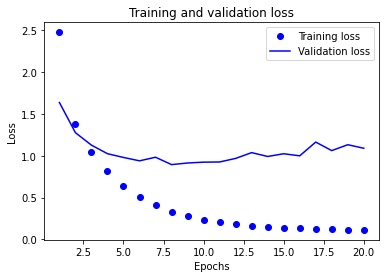

In [98]:
import matplotlib.pyplot as plt
import numpy

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

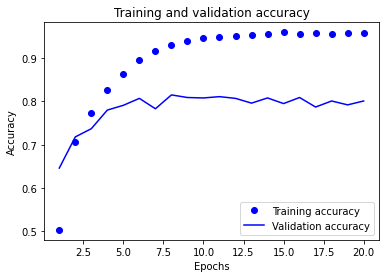

In [99]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [100]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 10ms/step - loss: 2.5993 - accuracy: 0.5590
Epoch 2/9
18/18 [==============================] - 13s 766ms/step - loss: 1.3778 - accuracy: 0.7227
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.0256 - accuracy: 0.7853
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.8083 - accuracy: 0.8279
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6411 - accuracy: 0.8648
Epoch 6/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5063 - accuracy: 0.8937
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.4104 - accuracy: 0.9124
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3381 - accuracy: 0.9279
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9705 - accuracy: 0.7854


In [102]:
results

[0.9704658389091492, 0.7853962779045105]


In [104]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.188780053428317

In [105]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [106]:
predictions[0].shape

(46,)

In [107]:
np.sum(predictions[0])

0.99999994

In [3]:
np.argmax(predictions[0])

NameError: name 'predictions' is not defined